In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('used_car_dataset.csv')
df.head()


C:\Users\SONY\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,publication_datetime,publication_history,location,provider,manufacturer,model,note,price_sek,price_history,...,electric_range_km,number_of_seats,car_type,length_mm,width_mm,height_mm,load_capacity_kg,empty_weight_kg,total_weight_kg,url
0,0,2021-03-17 00:00:00,NaN,Nora,RS Bilar AB,Peugeot,207,CC 1.6 VTi 120hk/ Endast 2 brukare,49900,NaN,...,NaN,NaN,Cab,NaN,NaN,NaN,NaN,NaN,NaN,/orebro/peugeot_207_cc_1_6_vti_120hk__endast_2...
1,1,2021-03-17 00:00:00,NaN,Ale,Auto Center West AB,Opel,Meriva,"1.3 CDTI, PDC Fram och Bak",79500,NaN,...,NaN,NaN,hatchback,NaN,NaN,NaN,NaN,NaN,NaN,/alvsborg/opel_meriva_1_3_cdti__pdc_fram_och_b...
2,2,2021-03-20 00:00:00,NaN,Ronneby,Maree s Bilar AB,BMW,M5,Sedan Automat 560hk V-Max S-såld Taklucka,309900,NaN,...,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,/blekinge/bmw_m5_sedan_automat_560hk_v_max_s_s...
3,3,2021-03-20 00:00:00,NaN,Norrköping,BilByter AB,Hyundai,i20,1.0 T-GDI 100hk Mild Hybrid Essential,186400,NaN,...,NaN,NaN,hatchback,NaN,NaN,NaN,NaN,NaN,NaN,/ostergotland/hyundai_i20_1_0_t_gdi_100hk_mild...
4,4,2021-03-20 00:00:00,NaN,Hisingen,Göte Carlsson i Göteborg AB,Opel,Combo-e,Kampanj Premium L2 50KW 136hk,538130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/goteborg/opel_combo_e_kampanj_premium_l2_50kw...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134243 entries, 0 to 134242
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        134243 non-null  int64  
 1   publication_datetime              134243 non-null  object 
 2   publication_history               33874 non-null   object 
 3   location                          133805 non-null  object 
 4   provider                          134243 non-null  object 
 5   manufacturer                      134243 non-null  object 
 6   model                             134243 non-null  object 
 7   note                              133671 non-null  object 
 8   price_sek                         134243 non-null  int64  
 9   price_history                     33885 non-null   object 
 10  entry_year                        134243 non-null  int64  
 11  fuel                              133981 non-null  o

In [4]:
# For finding the most day for publication the advertisement
df['publication_datetime_int'] = pd.to_datetime(df['publication_datetime'])
#df['Date_time'] = df['publication_datetime'].astype('datetime64[ns]')

df['publication_months'] = df['publication_datetime_int'].dt.month_name()
df['publication_days'] = df['publication_datetime_int'].dt.day_name()


df['publication_hours'] = df.publication_datetime_int.dt.hour
df['publication_minutes'] = df.publication_datetime_int.dt.minute
df.head()

,Unnamed: 0,publication_datetime,publication_history,location,provider,manufacturer,model,note,price_sek,price_history,...,height_mm,load_capacity_kg,empty_weight_kg,total_weight_kg,url,publication_datetime_int,publication_months,publication_days,publication_hours,publication_minutes
0,0,2021-03-17 00:00:00,NaN,Nora,RS Bilar AB,Peugeot,207,CC 1.6 VTi 120hk/ Endast 2 brukare,49900,NaN,...,NaN,NaN,NaN,NaN,/orebro/peugeot_207_cc_1_6_vti_120hk__endast_2...,2021-03-17,March,Wednesday,0,0
1,1,2021-03-17 00:00:00,NaN,Ale,Auto Center West AB,Opel,Meriva,"1.3 CDTI, PDC Fram och Bak",79500,NaN,...,NaN,NaN,NaN,NaN,/alvsborg/opel_meriva_1_3_cdti__pdc_fram_och_b...,2021-03-17,March,Wednesday,0,0
2,2,2021-03-20 00:00:00,NaN,Ronneby,Maree s Bilar AB,BMW,M5,Sedan Automat 560hk V-Max S-såld Taklucka,309900,NaN,...,NaN,NaN,NaN,NaN,/blekinge/bmw_m5_sedan_automat_560hk_v_max_s_s...,2021-03-20,March,Saturday,0,0
3,3,2021-03-20 00:00:00,NaN,Norrköping,BilByter AB,Hyundai,i20,1.0 T-GDI 100hk Mild Hybrid Essential,186400,NaN,...,NaN,NaN,NaN,NaN,/ostergotland/hyundai_i20_1_0_t_gdi_100hk_mild...,2021-03-20,March,Saturday,0,0
4,4,2021-03-20 00:00:00,NaN,Hisingen,Göte Carlsson i Göteborg AB,Opel,Combo-e,Kampanj Premium L2 50KW 136hk,538130,NaN,...,NaN,NaN,NaN,NaN,/goteborg/opel_combo_e_kampanj_premium_l2_50kw...,2021-03-20,March,Saturday,0,0


In [5]:
'''df_ne stands for dataframe of cars excluding electric cars
we should seperate these from each other as they're basically different in 
many aspectd'''

df_ne= df.loc[df['fuel']!='electric'].reset_index(drop=True)
df_e = df[df['fuel']=='electric'].reset_index(drop=True)
df_ne.head()


,Unnamed: 0,publication_datetime,publication_history,location,provider,manufacturer,model,note,price_sek,price_history,...,height_mm,load_capacity_kg,empty_weight_kg,total_weight_kg,url,publication_datetime_int,publication_months,publication_days,publication_hours,publication_minutes
0,0,2021-03-17 00:00:00,NaN,Nora,RS Bilar AB,Peugeot,207,CC 1.6 VTi 120hk/ Endast 2 brukare,49900,NaN,...,NaN,NaN,NaN,NaN,/orebro/peugeot_207_cc_1_6_vti_120hk__endast_2...,2021-03-17,March,Wednesday,0,0
1,1,2021-03-17 00:00:00,NaN,Ale,Auto Center West AB,Opel,Meriva,"1.3 CDTI, PDC Fram och Bak",79500,NaN,...,NaN,NaN,NaN,NaN,/alvsborg/opel_meriva_1_3_cdti__pdc_fram_och_b...,2021-03-17,March,Wednesday,0,0
2,2,2021-03-20 00:00:00,NaN,Ronneby,Maree s Bilar AB,BMW,M5,Sedan Automat 560hk V-Max S-såld Taklucka,309900,NaN,...,NaN,NaN,NaN,NaN,/blekinge/bmw_m5_sedan_automat_560hk_v_max_s_s...,2021-03-20,March,Saturday,0,0
3,3,2021-03-20 00:00:00,NaN,Norrköping,BilByter AB,Hyundai,i20,1.0 T-GDI 100hk Mild Hybrid Essential,186400,NaN,...,NaN,NaN,NaN,NaN,/ostergotland/hyundai_i20_1_0_t_gdi_100hk_mild...,2021-03-20,March,Saturday,0,0
4,7,2021-03-20 00:00:00,NaN,Upplands Väsby,Väsby Bildepå,Volkswagen,Passat,2.0 TDI 4-Motion 190hk EU-6 Executive LED,179000,NaN,...,NaN,NaN,NaN,NaN,/stockholm/volkswagen_passat_2_0_tdi_4_motion_...,2021-03-20,March,Saturday,0,0


In [6]:
# OHE for transmission column : 1 demonstrates manual / 0 demonstrates automatic
from sklearn.preprocessing import LabelEncoder
c_to_n = ['model' , 'transmission' , 'type_of_drive' , 'car_type' ]
knn_ne=pd.DataFrame()
for column in c_to_n :    
    le =LabelEncoder()
    knn_ne[column + '_n']=le.fit_transform(df_ne[column])
knn_ne['entry_year_n'] =df_ne['entry_year']
knn_ne.head(7)

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86,1,1,0,2008
1,2312,1,1,6,2011
2,2136,0,1,3,2005
3,3387,1,1,6,2022
4,2502,0,2,9,2016
5,2521,1,2,9,2022
6,973,0,1,5,2014


In [7]:
# in transmission_n and type_of_drive columns the number 2 domenstrates NaN
# in car_type_n  column the number 9 domenstrates NaN
knn_ne.replace({'transmission_n':2} , np.nan , inplace=True)
knn_ne.replace({'type_of_drive_n':2} , np.nan , inplace=True)
knn_ne.replace({'car_type_n':9} , np.nan , inplace=True)
knn_ne.head()

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86,1.0,1.0,0.0,2008
1,2312,1.0,1.0,6.0,2011
2,2136,0.0,1.0,3.0,2005
3,3387,1.0,1.0,6.0,2022
4,2502,0.0,NaN,NaN,2016


In [8]:
from sklearn.impute import KNNImputer
knn_c = ['model_n' , 'transmission_n' , 'type_of_drive_n' , 'car_type_n',
         'entry_year_n' ]
#dfknn_c = df_ne[knn_c]
imputer = KNNImputer(n_neighbors=3)
knn_ne = pd.DataFrame(imputer.fit_transform(knn_ne) , columns = knn_ne.columns)
knn_ne.head(10)

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86.0,1.0,1.000000,0.0,2008.0
1,2312.0,1.0,1.000000,6.0,2011.0
2,2136.0,0.0,1.000000,3.0,2005.0
3,3387.0,1.0,1.000000,6.0,2022.0
4,2502.0,0.0,0.666667,5.0,2016.0
5,2521.0,1.0,1.000000,4.0,2022.0
6,973.0,0.0,1.000000,5.0,2014.0
7,559.0,0.0,0.000000,5.0,2013.0
8,1301.0,1.0,1.000000,6.0,2022.0
9,2521.0,0.0,1.000000,4.0,2022.0


In [9]:
knn_ne= knn_ne.round()
knn_ne.head()

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86.0,1.0,1.0,0.0,2008.0
1,2312.0,1.0,1.0,6.0,2011.0
2,2136.0,0.0,1.0,3.0,2005.0
3,3387.0,1.0,1.0,6.0,2022.0
4,2502.0,0.0,1.0,5.0,2016.0


In [10]:
# in transmission column 0: automatic / 1 : manual
# in type_of_drive column 0 :4WD  / 1 :2WD
# in car_type column 0:Cab /1:'Coupé' / 2: SUV / 3:Sedan / 4:commercial / 5 :estate car 
#/ 6 :hatchback / 7:'small' / 8 :'van'
knn_ne =knn_ne.replace({'transmission_n' : { 0 : 'automatic', 1 : 'manual'},
                'type_of_drive_n':{0 :'4WD'  , 1 :'2WD'} ,
                'car_type_n':{0:'Cab' , 1:'Coupé' , 2: 'SUV' , 3:'Sedan' , 4:'commercial' , 5 :'estate car' ,6 :'hatchback' , 7:'small' , 8 :'van'}} )
knn_ne.head()
#dfknn_c.info()

,model_n,transmission_n,type_of_drive_n,car_type_n,entry_year_n
0,86.0,manual,2WD,Cab,2008.0
1,2312.0,manual,2WD,hatchback,2011.0
2,2136.0,automatic,2WD,Sedan,2005.0
3,3387.0,manual,2WD,hatchback,2022.0
4,2502.0,automatic,2WD,estate car,2016.0


In [11]:
knn_c = [ 'transmission_n' , 'type_of_drive_n' , 'car_type_n']
knn_c2 = [ 'transmission' , 'type_of_drive' , 'car_type' ]
df_ne[knn_c2] = knn_ne[knn_c]

In [12]:
obj_columns_n = df_ne.select_dtypes(include='object').columns
obj_drops =['publication_datetime','publication_history','note','price_history','url']
obj_columns_n = obj_columns_n.drop(obj_drops, errors='ignore')
obj_columns_n

Index(['location', 'provider', 'manufacturer', 'model', 'fuel', 'transmission',
       'type_of_drive', 'emission_class', 'test_prozedure', 'car_type',
       'publication_months', 'publication_days'],
      dtype='object')

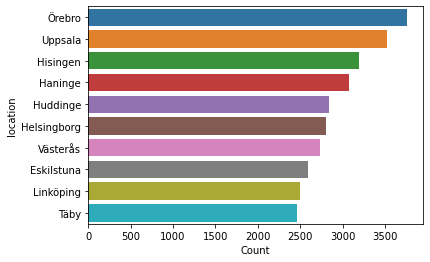

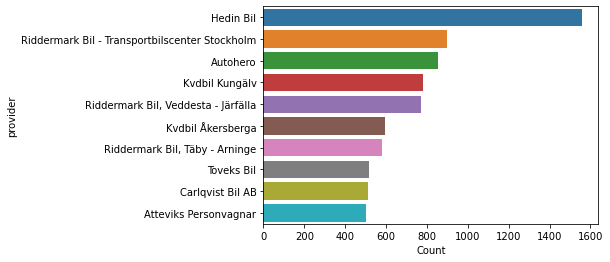

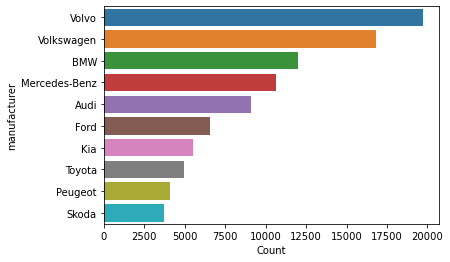

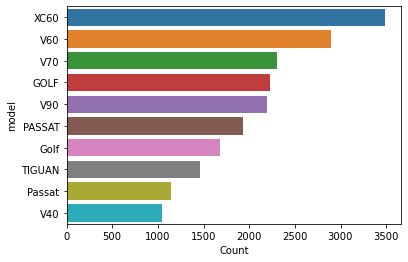

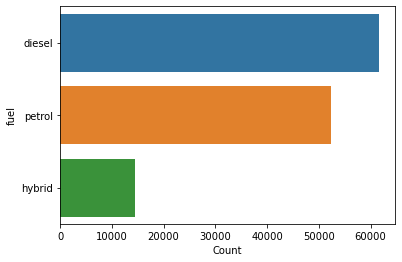

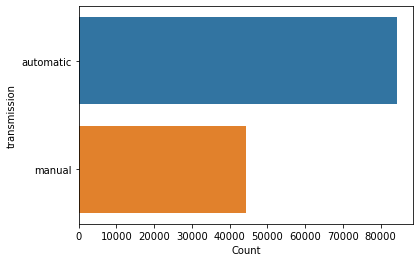

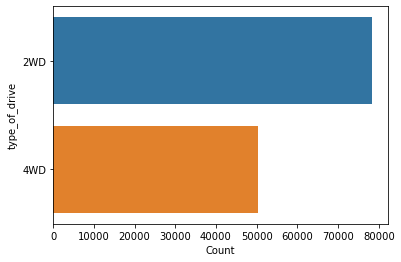

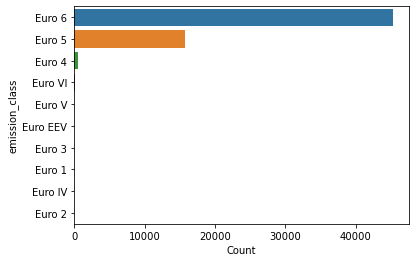

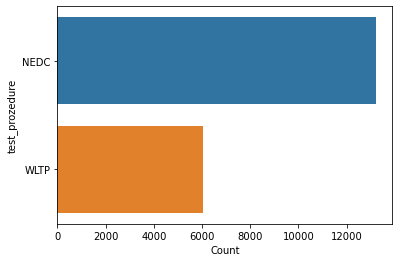

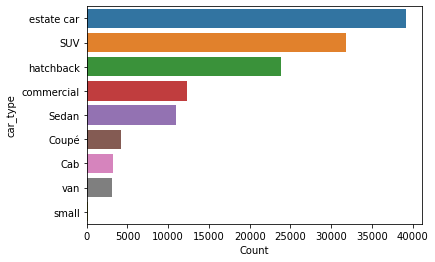

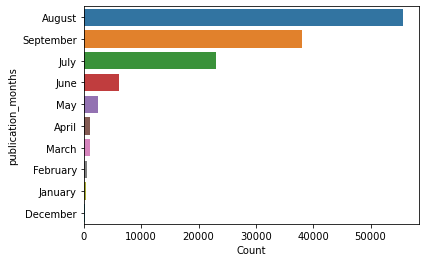

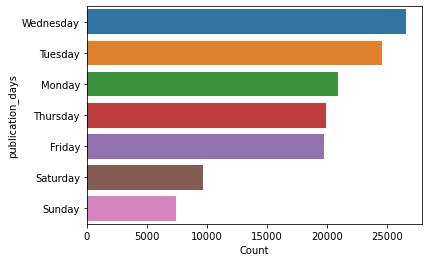

In [13]:
for i , c in enumerate(obj_columns_n):
    df_brief = df_ne[c].value_counts().to_frame(name='Count').reset_index().rename(columns={'index': c})
    sns.barplot(data=df_brief.head(10), y =c , x='Count')
    plt.show()

In [14]:
numeric_columns = df_ne.select_dtypes(include='number').columns
#numeric_columns_n = df.select_dtypes(include=['int64' , 'float64']).columns

numeric_columns 

Index(['Unnamed: 0', 'price_sek', 'entry_year', 'mileage_km', 'horse_power',
       'engine_size_ccm', 'top_speed_km_h', 'co2_emission_g/km',
       'fuel_consumption_mixed_l_100km', 'fuel_consumption_highway_l_100km',
       'electric_range_km', 'number_of_seats', 'length_mm', 'width_mm',
       'height_mm', 'load_capacity_kg', 'empty_weight_kg', 'total_weight_kg',
       'publication_hours', 'publication_minutes'],
      dtype='object')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


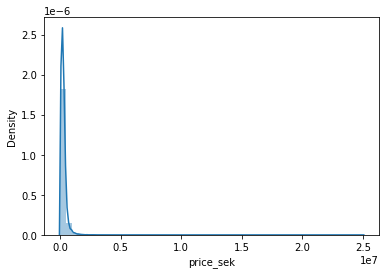

In [15]:
sns.distplot(df_ne['price_sek'], kde=True)
plt.show()

In [16]:
'''from displots we can easily find out that in all columns we have many 
outliers ; So for any further analysing we need to remove noise datas first.''' 

d = ['Unnamed: 0' ,'electric_range_km']
cl = numeric_columns.drop(d , errors='ignore')
dnd=pd.DataFrame() #dnd stands for deleted noise dataset 
def  delete_noise_datas(df_dn ,  q1p , q2p):
    for col in cl:
        q1 = np.nanpercentile(df_ne[col], q1p , axis=0)
        q2 = np.nanpercentile(df_ne[col], q2p , axis=0)
        dnd[col]=df_dn[ df_dn[col].between(q1 , q2)][col]
    return dnd


In [17]:
dnd = delete_noise_datas(df_ne ,  10 , 90 )
dnd.head()

,price_sek,entry_year,mileage_km,horse_power,engine_size_ccm,top_speed_km_h,co2_emission_g/km,fuel_consumption_mixed_l_100km,fuel_consumption_highway_l_100km,number_of_seats,length_mm,width_mm,height_mm,load_capacity_kg,empty_weight_kg,total_weight_kg,publication_hours,publication_minutes
1,79500,2011.0,68240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,309900,NaN,130180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,186400,2022.0,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,179000,2016.0,145000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5,342500,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


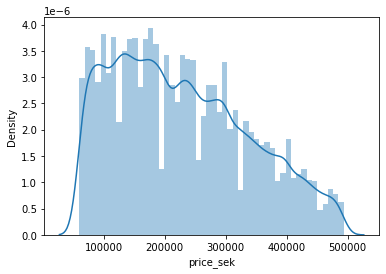

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


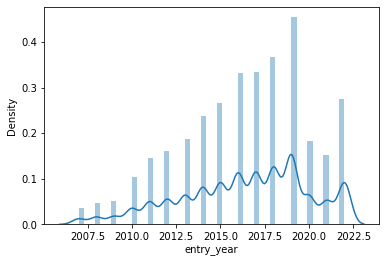

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


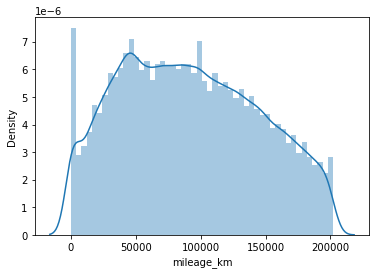

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


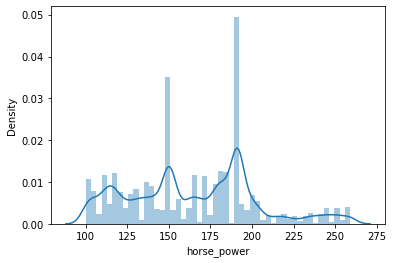

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


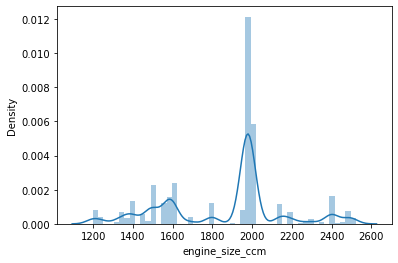

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


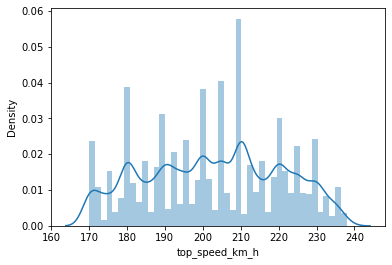

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


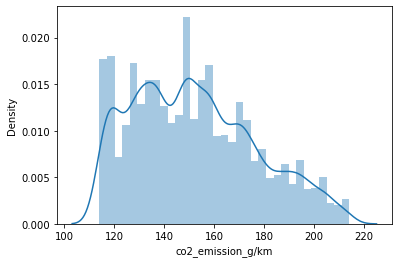

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


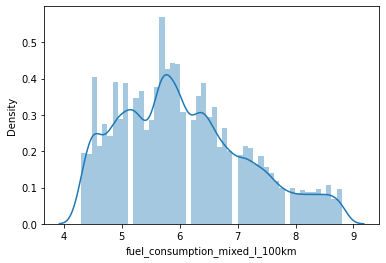

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


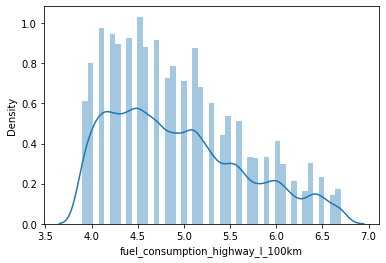

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


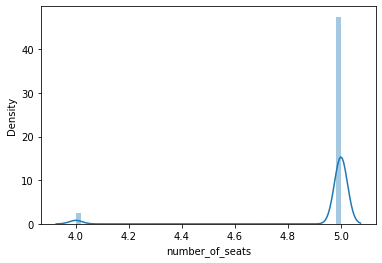

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


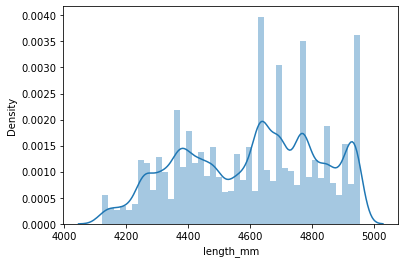

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


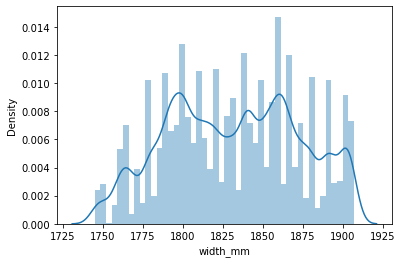

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


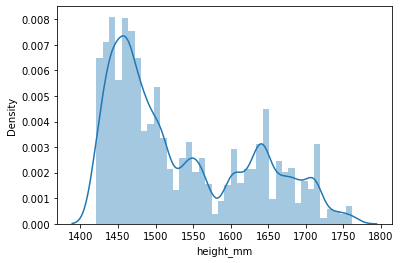

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


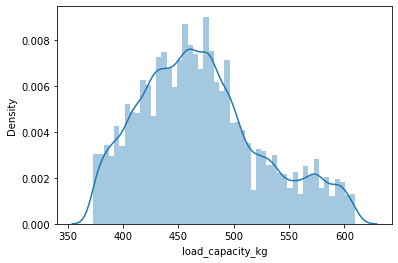

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


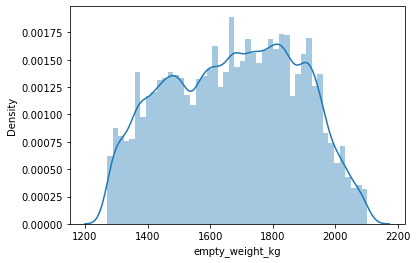

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


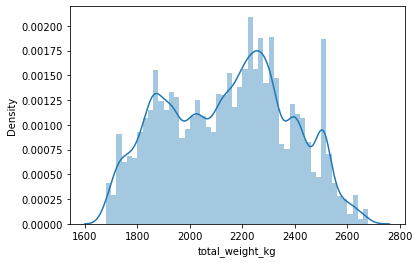

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


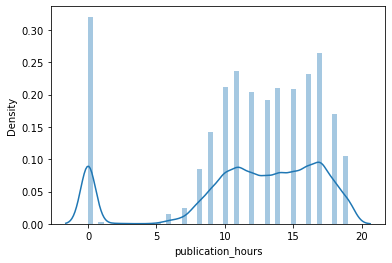

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


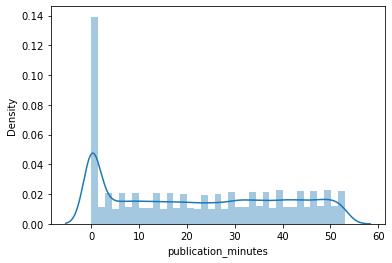

In [18]:
for column in cl:
    sns.distplot(dnd[column], kde=True)
    plt.show()